# part 2

1-Import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import the merged dataframe from part1 in a memory safe way

table = pq.read_table(
    "orders_customers_combined.parquet",
    memory_map=True
)

In [3]:
df_combined = table.to_pandas(
    split_blocks=True,
    self_destruct=True
)

In [4]:
# quick check
df_combined.shape

(32404859, 31)

In [19]:
df_combined.head(2)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_of_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3- In this section, I have to provide the Instacart senior stakeholders with descriptive findings about sales.
Create a histogram of the “order_hour_of_day” column & describe what the histogram demonstrates.

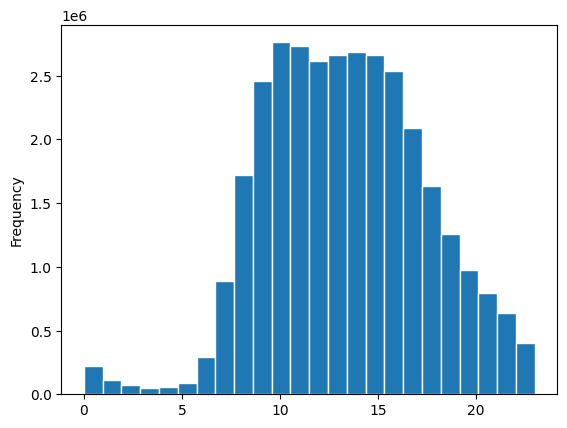

In [ ]:
# creating a histogram
hist = df_combined['order_hour_of_day'].plot.hist(bins = 24, edgecolor= 'white')

Breif description: Instacart order activity peaks during late morning and early afternoon (9a.m. to 15-16 p.m.), with minimal demand during overnight hours, reflecting strong alignment with customers’ daily shopping routines.

# 04-The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

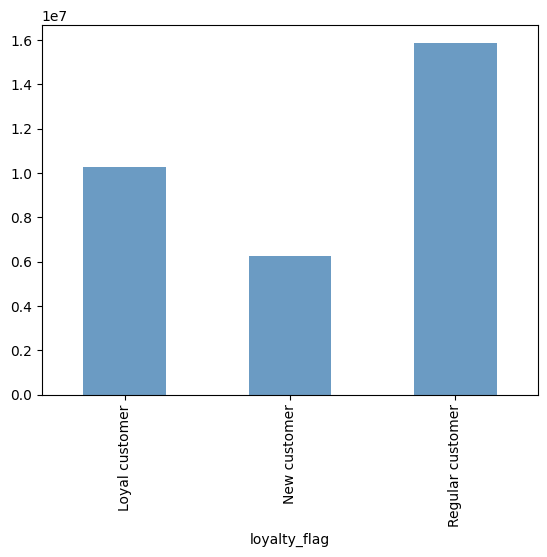

In [10]:
# creating a bar chart with loyalty flag
bar_loyalty = df_combined['loyalty_flag'].value_counts().sort_index().plot.bar(color='steelblue', alpha=0.8)

# 05-Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!) depending on the hour of the day. 

In [11]:
# For this section, I start with sampling: define a random sample
np.random.seed(4)

In [13]:
# creating a list holding True/False values to test np.rando.rand<= 0.7, where  dev variable produces a boolean array
dev = np.random.rand(len(df_combined)) <= 0.7


In [14]:
# checking the dev 
dev

array([False,  True, False, ...,  True,  True,  True], shape=(32404859,))

In [15]:
# store 70% of the sample in the dataframe big
big = df_combined[dev]

In [16]:
# store 30% of the sample in the dataframe small
small = df_combined [~dev]

In [17]:
# before moving further, we should check whether the length of sum of 70% dataframe (big)+30%(small) is equal to original dataframe (df)size
len(df_combined)

32404859

In [18]:
len (big)+ len (small)

32404859

As it is clear, the length of the dataframes are the same.

In [21]:
# To speed up the processing time, I reduce the  samples to only those columns necessary for the chart, 
# namely “prices” and "order_hour_of_day.” 
df_combined_2 = small[['order_hour_of_day','prices']]

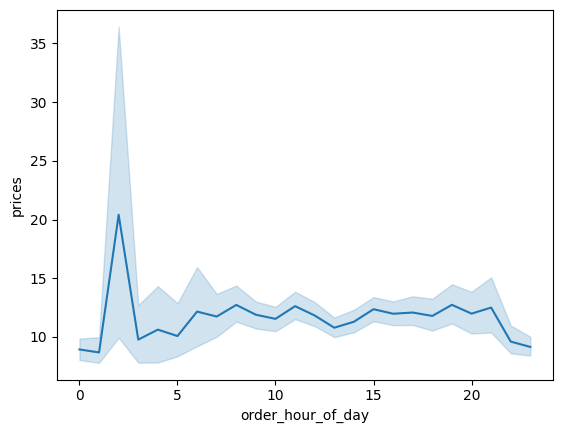

In [22]:
# now I can create a line chart
line = sns.lineplot(data = df_combined_2, x = 'order_hour_of_day',y = 'prices')

# 06- conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
# in line with the concept of sampling, for this chart, too, I will include the essenntial columns only.
df_combine_3 = small [['age', 'number_of_dependants']]

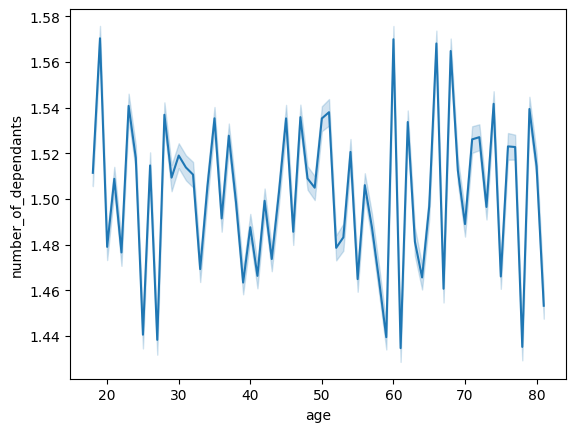

In [24]:
#Now I create the line chart
line_2 = sns.lineplot(data = df_combine_3, x = 'age',y = 'number_of_dependants')

short description: Across the age range examined, the average number of dependants remains close to 1.5, indicating that most age groups tend to have around one to two dependants on average. While the values fluctuate at specific ages, there is no consistent upward or downward pattern overall, suggesting that age alone does not strongly explain variation in the number of dependants in this dataset.

# 07_explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [25]:
# use of sampling
df_combined_4 = small[['age','income']]

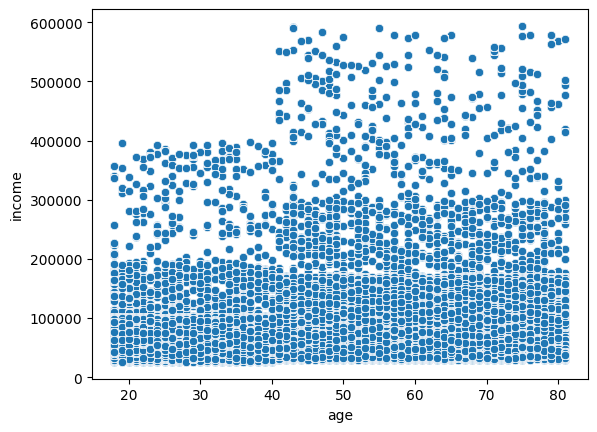

In [26]:
# creating a scattorplot
scatterplot = sns.scatterplot( x = 'age', y = 'income', data = df_combined_4)

Brief description: The scatterplot shows a wide dispersion of income levels across all ages, with no clear linear relationship between age and income. While higher incomes appear more frequently at middle and older ages, considerable income variation exists at every age, indicating that age alone does not strongly predict income in this dataset.

# 09- Exporting the visualisations

In [27]:
# histogram
hist.figure.savefig('hist_order_hour_of_day.png')

In [28]:
# bar chart
bar_loyalty.figure.savefig('loyalty_flag_bar_plot.png')

In [29]:
# line chart1: relation btw  the prices & the hour of the day
line.figure.savefig('expenditue_over_hour_line_chart.png')

In [30]:
# line chart 2: relation btw age & number of dependants
line_2.figure.savefig('age_and_dependants_line_chart')

In [31]:
# scatterplot 
scatterplot.figure.savefig('scatterplot_age_and _income.png')